Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

Importing libraries

In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

Get train and test data from drive

In [54]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [55]:
rootpath = '/content/gdrive/MyDrive/Skin_Data_Store'
data_train = pathlib.Path(rootpath +'/Train')
data_test = pathlib.Path(rootpath +'/Test')

In [56]:
# Train and test mage count
image_count_train = len(list(data_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


Defining parameters

In [58]:
# Defining parameters
batch_size=32
img_height = 180
img_width = 180

Splitting training data to training(80%) and validation(20%)

Defining training dataset

In [59]:
train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    data_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


Defining Validation dataset

In [60]:
val_ds= tf.keras.preprocessing.image_dataset_from_directory(
    data_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


Defining test dataset

In [61]:
test_ds= tf.keras.preprocessing.image_dataset_from_directory(
    data_test,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 118 files belonging to 9 classes.


Listing out all the classes of skin cancer and store them in a list.

In [62]:
class_names= train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Visualize the data

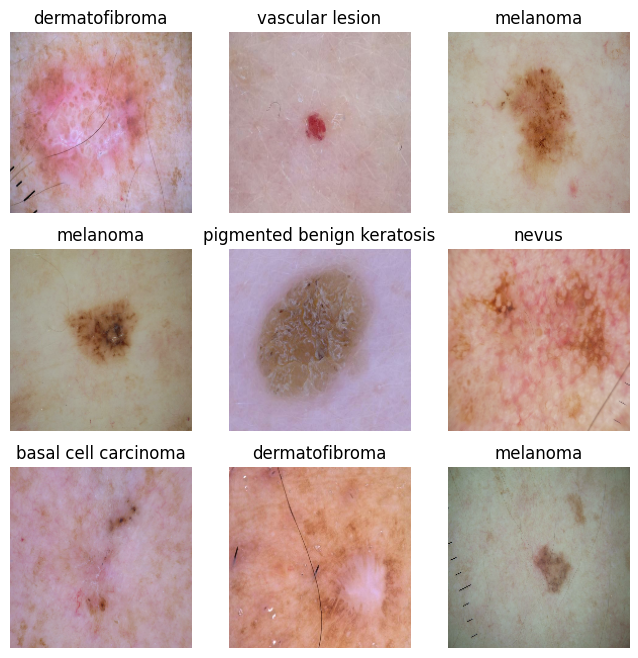

In [63]:
plt.figure(figsize=(8,8))
for images , labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Keeping the images in memory after they're loaded off disk during the first epoch.

In [64]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds= val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Creating Model1

In [65]:
classes = 9

#Building model without dropouts
model = Sequential([
          layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
          layers.Conv2D(32, 3, padding="same", activation="relu"),
          layers.MaxPooling2D(pool_size=(2,2)),
          layers.Conv2D(64, 3, padding= "same", activation="relu"),
          layers.MaxPooling2D(pool_size=(2,2)),
          layers.Conv2D(128, 3, padding= "same", activation= "relu"),
          layers.MaxPooling2D(pool_size=(2,2)),
          layers.Flatten(),
          layers.Dense(256, activation="relu"),
          layers.Dense(classes)
 ])


Compile the model

In [66]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
#view summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 128)      

Train the model

In [68]:
epochs=20
history= model.fit(
    train_ds,
    validation_data= val_ds,
    epochs= epochs
)

Epoch 1/20
169/169 [==============================] - 45s 86ms/step - loss: 1.8268 - accuracy: 0.3268 - val_loss: 1.5153 - val_accuracy: 0.4143
Epoch 2/20
169/169 [==============================] - 7s 39ms/step - loss: 1.3890 - accuracy: 0.4811 - val_loss: 1.2496 - val_accuracy: 0.5278
Epoch 3/20
169/169 [==============================] - 7s 40ms/step - loss: 1.1855 - accuracy: 0.5658 - val_loss: 1.1837 - val_accuracy: 0.5679
Epoch 4/20
169/169 [==============================] - 7s 39ms/step - loss: 0.9977 - accuracy: 0.6447 - val_loss: 1.0081 - val_accuracy: 0.6325
Epoch 5/20
169/169 [==============================] - 7s 39ms/step - loss: 0.8280 - accuracy: 0.7005 - val_loss: 0.8907 - val_accuracy: 0.6689
Epoch 6/20
169/169 [==============================] - 7s 40ms/step - loss: 0.6556 - accuracy: 0.7658 - val_loss: 0.8605 - val_accuracy: 0.7127
Epoch 7/20
169/169 [==============================] - 7s 39ms/step - loss: 0.5502 - accuracy: 0.8010 - val_loss: 0.8451 - val_accuracy: 0.718

Visualizing training results

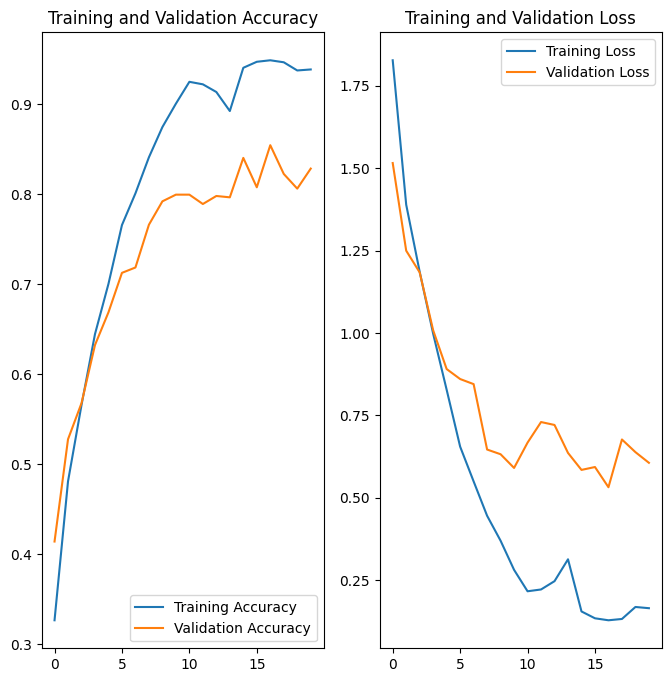

In [69]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']

loss = history.history['loss']
val_loss= history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Findings

1.   The above result shows that the model is overfitting due to high accuracy and difference between the acurracy and validation accuracy. It could be due to that the model is not generalizing properly.
2.   In this situation, Data Augmentation could help solve overfitting by increasing the diversity of dataset by applying random but realistic transformations such as image rotation, shearing, hortizontal & vertical flips, zooming, de-centering etc.




Augmentation

In [70]:
augmentation = keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                 layers.experimental.preprocessing.RandomRotation(0.1),
                                 layers.experimental.preprocessing.RandomZoom(0.1)
])

View Images after augmentation

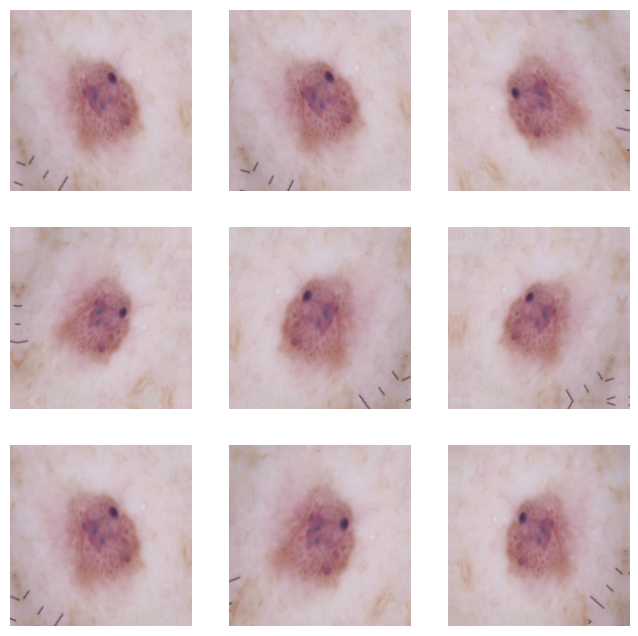

In [71]:
plt.figure(figsize=(8,8))
for images, labels in train_ds.take(1):
  for i in range(9):
    aug_images= augmentation(images)
    ax= plt.subplot(3, 3, i+1)
    plt.imshow(aug_images[0].numpy().astype("uint8"))
    plt.axis("off")

Creating Model 2

In [72]:
# Building the model after augmentation and with dropouts
model = Sequential([
          augmentation,
          layers.experimental.preprocessing.Rescaling(1./255),
          layers.Conv2D(32, 3, padding="same", activation="relu"),
          layers.MaxPooling2D(pool_size=(2,2)),
          layers.Conv2D(64, 3, padding="same", activation="relu"),
          layers.MaxPooling2D(pool_size=(2,2)),
          layers.Conv2D(128, 3, padding="same", activation="relu"),
          layers.MaxPooling2D(pool_size=(2,2)),
          layers.Dropout(0.2),
          layers.Flatten(),
          layers.Dense(256, activation="relu"),
          layers.Dense(classes)
])

Compile the model

In [73]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [74]:
# view summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                 

Train the model

In [75]:
history = model.fit(train_ds,
                    validation_data= val_ds,
                    epochs= epochs)

Epoch 1/20
169/169 [==============================] - 14s 63ms/step - loss: 1.9379 - accuracy: 0.2730 - val_loss: 1.5536 - val_accuracy: 0.4105
Epoch 2/20
169/169 [==============================] - 11s 63ms/step - loss: 1.5084 - accuracy: 0.4282 - val_loss: 1.5295 - val_accuracy: 0.4195
Epoch 3/20
169/169 [==============================] - 10s 62ms/step - loss: 1.3754 - accuracy: 0.4727 - val_loss: 1.2917 - val_accuracy: 0.5160
Epoch 4/20
169/169 [==============================] - 10s 62ms/step - loss: 1.2799 - accuracy: 0.5054 - val_loss: 1.2079 - val_accuracy: 0.5553
Epoch 5/20
169/169 [==============================] - 10s 62ms/step - loss: 1.2421 - accuracy: 0.5254 - val_loss: 1.2379 - val_accuracy: 0.5256
Epoch 6/20
169/169 [==============================] - 10s 62ms/step - loss: 1.1487 - accuracy: 0.5655 - val_loss: 1.0326 - val_accuracy: 0.6050
Epoch 7/20
169/169 [==============================] - 10s 62ms/step - loss: 1.1352 - accuracy: 0.5757 - val_loss: 1.0599 - val_accuracy:

Visualizing the results

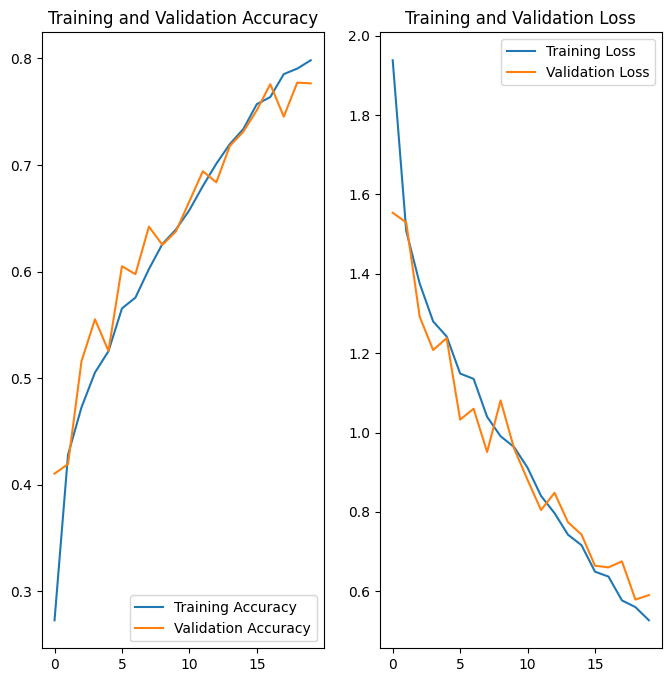

In [76]:
# Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Findings

1.   After applying the data augmentation, the results have been changed. It is not overfitting anymore but now it shows a sign of underfitting.
2.   The low accuracy tells us that the model is not performing well on the training data.




In [77]:
path_list = [ x for x in glob(os.path.join(data_train, '*', '*.jpg')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_train, '*', '*.jpg')) ]
print(len(lesion_list))

2239


In [78]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('/content/gdrive/MyDrive/Skin_Data_Store/Train/seborrheic keratosis/ISIC_0010890.jpg', 'seborrheic keratosis'), ('/content/gdrive/MyDrive/Skin_Data_Store/Train/seborrheic keratosis/ISIC_0010852.jpg', 'seborrheic keratosis')]


In [79]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head(10)

,Path,Label
0,/content/gdrive/MyDrive/Skin_Data_Store/Train/...,seborrheic keratosis
1,/content/gdrive/MyDrive/Skin_Data_Store/Train/...,seborrheic keratosis
2,/content/gdrive/MyDrive/Skin_Data_Store/Train/...,seborrheic keratosis
3,/content/gdrive/MyDrive/Skin_Data_Store/Train/...,seborrheic keratosis
4,/content/gdrive/MyDrive/Skin_Data_Store/Train/...,seborrheic keratosis
5,/content/gdrive/MyDrive/Skin_Data_Store/Train/...,seborrheic keratosis
6,/content/gdrive/MyDrive/Skin_Data_Store/Train/...,seborrheic keratosis
7,/content/gdrive/MyDrive/Skin_Data_Store/Train/...,seborrheic keratosis
8,/content/gdrive/MyDrive/Skin_Data_Store/Train/...,seborrheic keratosis
9,/content/gdrive/MyDrive/Skin_Data_Store/Train/...,seborrheic keratosis


In [80]:
# Displaying the number of images in each category

original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

In [81]:
# Displaying the percentage of images date in each category

(original_df[['Label']].value_counts() / len(original_df)) * 100

Label                     
pigmented benign keratosis    20.634212
melanoma                      19.562305
basal cell carcinoma          16.793211
nevus                         15.944618
squamous cell carcinoma        8.083966
vascular lesion                6.208129
actinic keratosis              5.091559
dermatofibroma                 4.242966
seborrheic keratosis           3.439035
dtype: float64

# Findings

*   Which class has the least number of samples?
    
    'seborrheic keratosis' class contains around 3.5% of the data with 77 images which is the lowest of all.


*   Which classes dominate the data in terms proportionate number of samples?

    Class 'pigmented benign keratosis' have around 21% of the sample data with 462 images which is highest of all.



Using Augmentor library

In [82]:
# Installing the Augmentor library
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
# Adding 500 images to each class using the Augmentor library
path_to_training_dataset = str(data_train) + '/'
import Augmentor
for i in class_names:
  p = Augmentor.Pipeline(path_to_training_dataset +i)
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation =10)
  p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Store/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1C509AA380>: 100%|██████████| 500/500 [00:31<00:00, 16.01 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Store/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1C32E24370>: 100%|██████████| 500/500 [00:31<00:00, 15.85 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Store/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1BB65BB310>: 100%|██████████| 500/500 [00:26<00:00, 18.98 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Store/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7F1C50C18970>: 100%|██████████| 500/500 [01:45<00:00,  4.75 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Store/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F1C32B7FA30>: 100%|██████████| 500/500 [01:57<00:00,  4.25 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Store/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1BB6092830>: 100%|██████████| 500/500 [00:26<00:00, 18.96 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Store/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1C32B7FA30>: 100%|██████████| 500/500 [00:56<00:00,  8.92 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Store/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1BB6092830>: 100%|██████████| 500/500 [00:24<00:00, 20.47 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin_Data_Store/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1BB698A1A0>: 100%|██████████| 500/500 [00:25<00:00, 19.41 Samples/s]


In [36]:
# Display the total number of images which are created by Augmentor library
image_count_train = len(list(data_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [38]:
# Displaying the path of of new images.
path_list_new = [x for x in glob(os.path.join(data_train, '*','output', '*.jpg'))]
path_list_new[:10]

['/content/gdrive/MyDrive/Skin_Data_Store/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010934.jpg_be61394b-a249-4fa5-91d1-4e54c5b014b6.jpg',
 '/content/gdrive/MyDrive/Skin_Data_Store/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010938.jpg_e5ff5275-cf74-4c7f-9e51-6f6825d2a0c5.jpg',
 '/content/gdrive/MyDrive/Skin_Data_Store/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010925.jpg_0bd93a37-d186-4ddc-b60c-93b462a36311.jpg',
 '/content/gdrive/MyDrive/Skin_Data_Store/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011158.jpg_fc2a0e78-4537-4ae1-8c53-d795352a22eb.jpg',
 '/content/gdrive/MyDrive/Skin_Data_Store/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010863.jpg_5ad2b3a7-e10a-4579-8efd-16aa677afc1c.jpg',
 '/content/gdrive/MyDrive/Skin_Data_Store/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010942.jpg_3ac5c214-1204-47c3-adec-f800ef2fb304.jpg',
 '/c

In [41]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [42]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [43]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-43-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [44]:
new_df.shape

(6739, 2)

In [45]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [46]:
batch_size = 32
img_height = 180
img_width = 180

Creating training dataset

In [47]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


Creating validation dataset

In [48]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


Create model

In [49]:
## your code goes here

model = Sequential([
  augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(128, 3, padding="same", activation="relu"),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(classes)
])

Compile model

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [51]:
epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 45s 244ms/step - loss: 1.8974 - accuracy: 0.2886 - val_loss: 1.6652 - val_accuracy: 0.3920
Epoch 2/30
169/169 [==============================] - 41s 238ms/step - loss: 1.4990 - accuracy: 0.4286 - val_loss: 1.3682 - val_accuracy: 0.4855
Epoch 3/30
169/169 [==============================] - 43s 251ms/step - loss: 1.3837 - accuracy: 0.4759 - val_loss: 1.2579 - val_accuracy: 0.5271
Epoch 4/30
169/169 [==============================] - 40s 228ms/step - loss: 1.3129 - accuracy: 0.4981 - val_loss: 1.2028 - val_accuracy: 0.5598
Epoch 5/30
169/169 [==============================] - 42s 243ms/step - loss: 1.2349 - accuracy: 0.5274 - val_loss: 1.2706 - val_accuracy: 0.5345
Epoch 6/30
169/169 [==============================] - 42s 243ms/step - loss: 1.1912 - accuracy: 0.5449 - val_loss: 1.1509 - val_accuracy: 0.5561
Epoch 7/30
169/169 [==============================] - 42s 241ms/step - loss: 1.1367 - accuracy: 0.5640 - val_loss: 1.1517 - val_ac

Visualize the model results

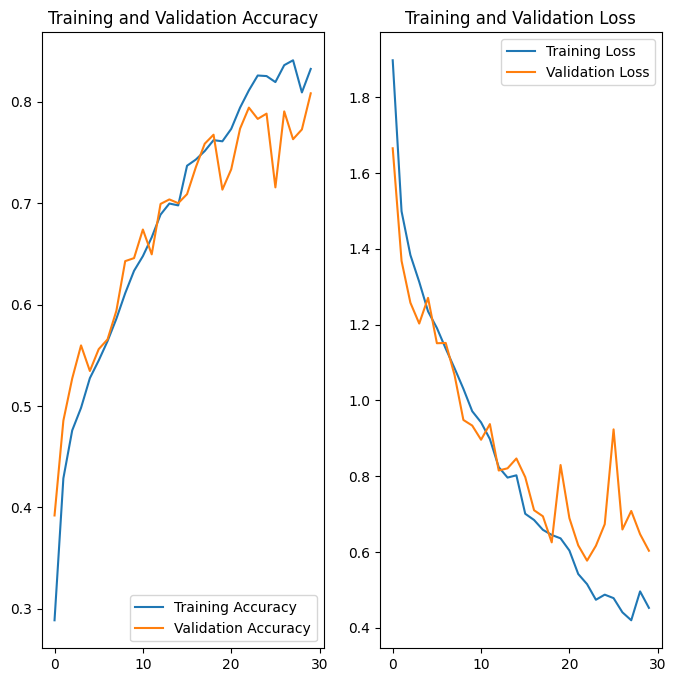

In [52]:
# Visualizing the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?


1.   In the final model, class rebalanced has imporved the model performance.
2.   Model training accuracy and validation accuracy both are improved. This tells us that the model is generalizing very well.
3.   There is no sign of underfitting and overfitting.
4.   After 30 epochs, we are getting around 83% accuracy and around 80% of validation accuracy

